In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = np.array([-0.51,51.2])
y = np.array([0.33,51.6])

means = [x.mean(),y.mean()]

stds = [x.std()/3, y.std()/3]

correlation = 0.8

covs = [
    [stds[0]**2 ,stds[0]*stds[1]*correlation],
    [stds[0]*stds[1]*correlation, stds[1]**2]
     ]

m = np.random.multivariate_normal(means,covs,1000).T

In [6]:
m.shape

(2, 1000)

In [7]:
df = pd.DataFrame()

df['Experience in Months'] = m[0]
df['Salary in Thousands'] = m[1]

In [8]:
df

,Experience in Months,Salary in Thousands
0,19.910744,29.062993
1,21.319481,23.998906
2,16.420696,21.039404
3,25.954576,28.240239
4,17.689778,20.496927
...,...,...
995,17.381392,21.133081
996,28.733150,23.668872
997,25.114991,34.719073
998,39.938001,39.486696


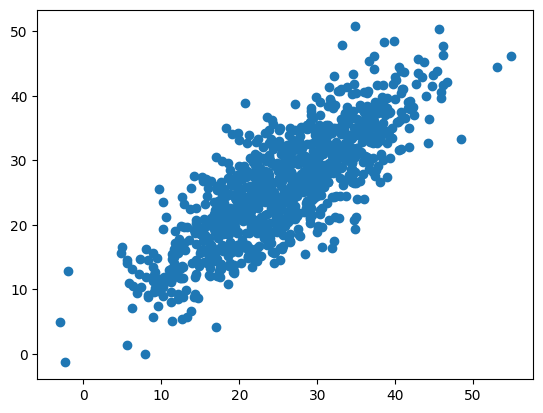

In [11]:
scatter_plot = plt.scatter(df['Experience in Months'],df['Salary in Thousands'])

In [14]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [16]:
X.shape

(1000, 1)

In [17]:
y.shape

(1000,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)


(800, 1)
(200, 1)


In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
print(lr.coef_[0])

0.7878764690638518


In [26]:
print(lr.intercept_)

5.766321027306887


In [27]:
df_error = pd.DataFrame()

df_error['y_test'] = y_test
df_error['y_hat'] = y_pred

In [28]:
df_error

,y_test,y_hat
0,11.011172,13.891957
1,21.741658,25.169073
2,24.945223,29.022810
3,27.447862,26.326949
4,34.590390,33.499252
...,...,...
195,10.147710,13.022007
196,22.990428,27.108758
197,25.974266,21.422093
198,24.585325,29.223236


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))

print("Mean Squared Error is",mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error is",np.sqrt(mean_squared_error(y_test,y_pred)))


print("R2-score is",r2_score(y_test,y_pred))


Mean Absolute Error is 3.950895343832057
Mean Squared Error is 24.03720064453658
Root Mean Squared Error is 4.9027747903138055
R2-score is 0.655809157768914


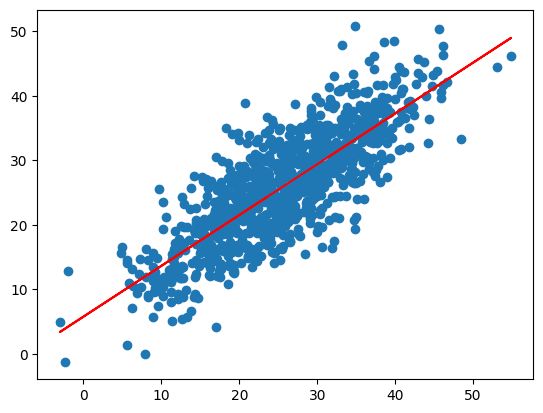

In [37]:
# Visualising the regression line
plt.plot(X_train,lr.predict(X_train), color='red')
plt.scatter(df['Experience in Months'],df['Salary in Thousands'])